<a href="https://colab.research.google.com/github/KamilShape/workers_regression_project/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [111]:
!git clone https://github.com/KamilShape/data_bases

fatal: destination path 'data_bases' already exists and is not an empty directory.


In [113]:
heart = pd.read_csv('data_bases/heart.csv')

### **1. SETTINGS**

In [115]:
plt.style.use('bmh')

### **2. DATA BASE EXPLANATION**

source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

*   age - age in years
*   sex - 1 = male; 0 = female
*   cp - chest pain type
*   trestbps - resting blood pressure (in mm Hg on admission to the hospital)
*   chol - serum cholestoral in mg/dl
*   fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
*   restecg - resting electrocardiographic results
*   thalach - maximum heart rate achieved
*   exang - exercise induced angina (1 = yes; 0 = no)
*   oldpeak - ST depression induced by exercise relative to rest
*   slope - the slope of the peak exercise ST segment
*   ca - number of major vessels (0-3) colored by flourosopy
*   thal - 1 = normal; 2 = fixed defect; 3 = reversable defect
*   target - 0 = no disease; 1 = disease















### **3. DATA BASE ANALYSIS**

In [117]:
#data base
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

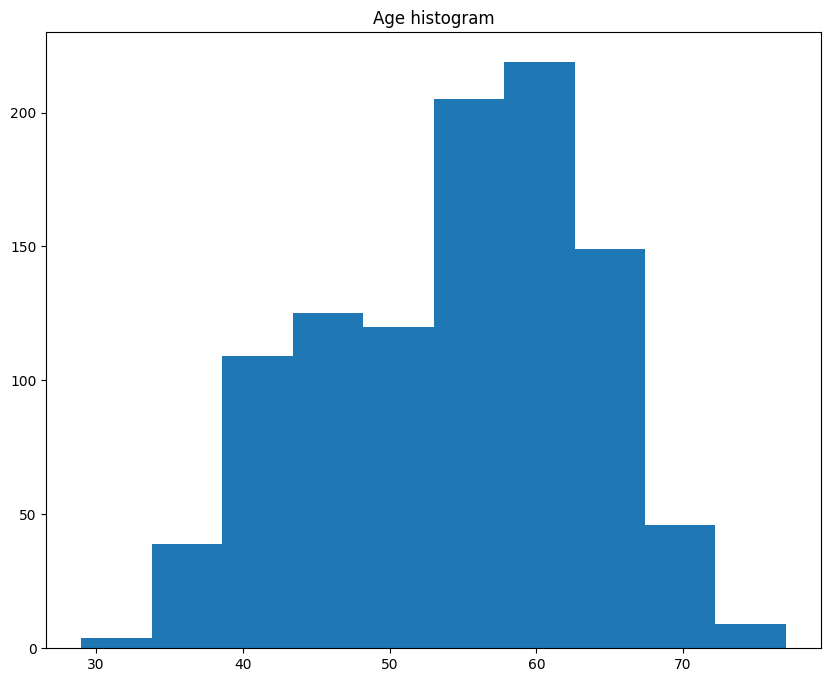

In [119]:
#age histogram
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Age histogram')
ax.hist(heart['age'])
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r') 

In [121]:
#shapiro - wilk test
shapiro_test = stats.shapiro(heart['age'])
shapiro_test.pvalue
#p<0,05 - no bell curve

5.04160047043456e-09

In [123]:
#add age range column
heart['age range'] = pd.cut(x = heart['age'], 
                            bins = [20,30,40,50,60,70,80], 
                            labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [125]:
#sorted postive tests by age range
positive_group = heart[heart['target'] == 1]
sorted_positive_group = pd.DataFrame(positive_group['age range'].value_counts().values, positive_group['age range'].value_counts().index).reset_index().sort_values(by='index')
sorted_positive_group.columns = ['age range', 'tests number'] 
sorted_positive_group['tests percent'] = (sorted_positive_group['tests number']/sorted_positive_group['tests number'].sum()*100).round(decimals = 2)

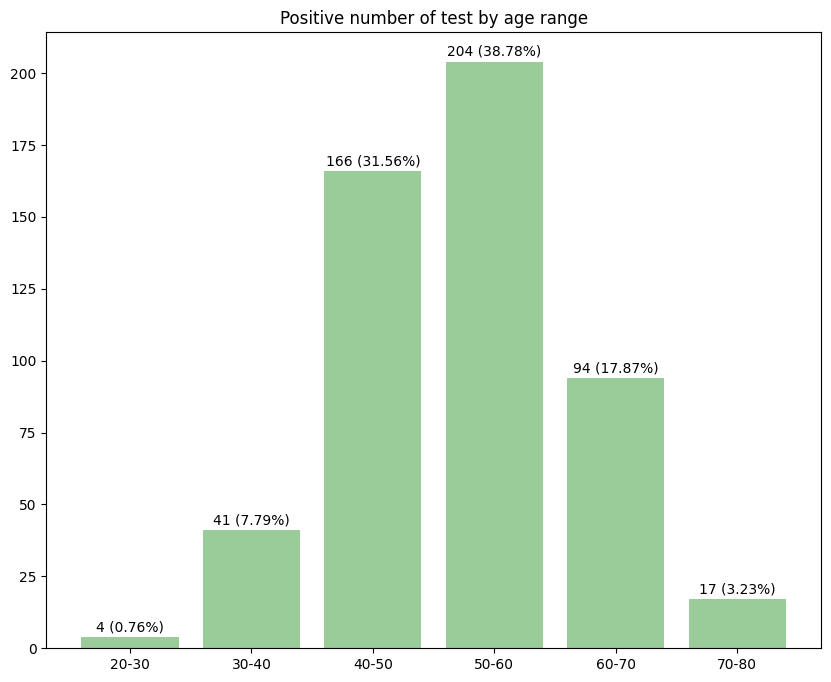

In [127]:
#positive number of test by age range
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(sorted_positive_group['age range'], sorted_positive_group['tests number'], color='g', alpha=0.4)
ax.set_title('Positive number of test by age range')

for i in range(0, len(sorted_positive_group)):
  ax.annotate(str(sorted_positive_group['tests number'][i]) + ' ' +'(' + str(sorted_positive_group['tests percent'][i]) + '%' + ')', 
              (sorted_positive_group['age range'][i], sorted_positive_group['tests number'][i]+2),
              ha='center')

In [129]:
#data frame presenting negative and positive tests because of sex
data = {}
for i in range(0,2):
  sex_group = heart[heart['sex'] == i]
  negative_tests = sex_group[sex_group['target'] == 0]['target'].count()
  positve_tests = sex_group[sex_group['target'] == 1]['target'].count()
  sex = 'Female' if i == 0 else 'Male'
  datas = {sex: (negative_tests, positve_tests)}
  data.update(datas)
data
tests_by_sex = pd.DataFrame.from_dict(data,orient='index', columns=['Negative', 'Positive']).reset_index()
tests_by_sex

,index,Negative,Positive
0,Female,86,226
1,Male,413,300


<ipython-input-131-2ec9f31e89bd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  tests_by_sex_melt.pivot('index', 'variable', 'value').plot(kind='bar',


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

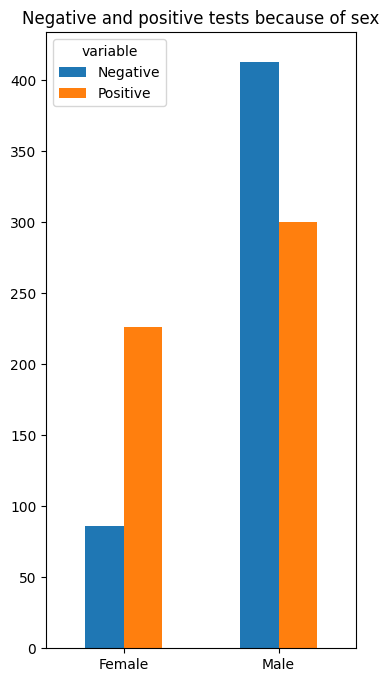

In [131]:
tests_by_sex_melt = tests_by_sex.melt(id_vars = 'index', value_vars=['Negative', 'Positive'])
tests_by_sex_melt.pivot('index', 'variable', 'value').plot(kind='bar', 
                                                           xlabel='', 
                                                           figsize=(4,8), 
                                                           title='Negative and positive tests because of sex')
plt.xticks(rotation = 0)

[Text(0.5, 1.0, 'Correlation map')]

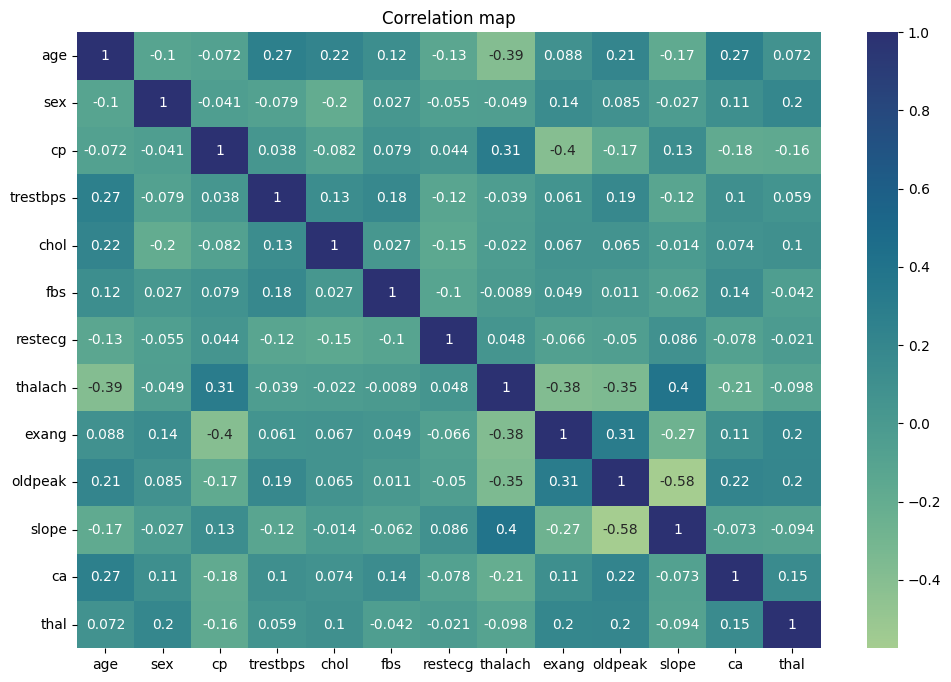

In [133]:
#correlation map
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(heart.iloc[:,:-2].corr(), annot=True, cmap="crest").set(title='Correlation map')

### **4. BALANCING DATA SET**

Training and test data

In [135]:
#libraries import
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [137]:
#X set
X = heart.iloc[:,:-2]

In [139]:
#y set
y = heart['target']

In [141]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

4.1 Oversampling

In [143]:
over = RandomOverSampler(random_state=123)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

4.2 Undersampling

In [145]:
under = RandomUnderSampler(random_state=123)
X_train_under, y_train_under=under.fit_resample(X_train, y_train)

4.3 Smote

In [146]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### **5. LOGISTIC REGRESSION MODELS**




In [147]:
#libraries import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


 5.1 Logistic regression







In [148]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
y_pred = log_model.predict(X_test)

<Axes: >

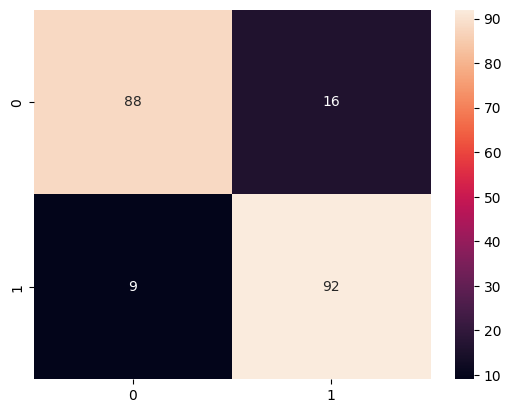

In [150]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
#heat map
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')

In [151]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       104
           1       0.85      0.91      0.88       101

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



 5.2 Logistic regression - oversampling

In [152]:
log_model_over = LogisticRegression()
log_model_over.fit(X_train_over, y_train_over)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
y_pred_over = log_model_over.predict(X_test)

<Axes: >

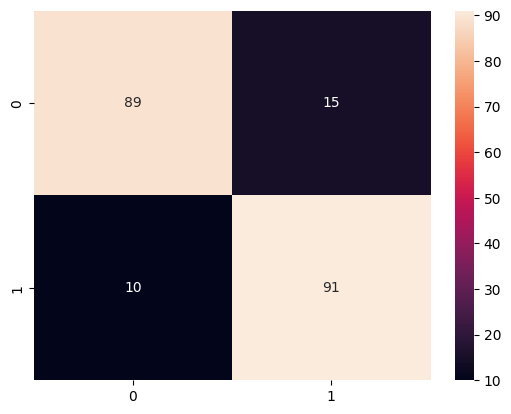

In [154]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_over)
#heat map
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')

In [155]:
#classification report
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       104
           1       0.86      0.90      0.88       101

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



 5.3 Logistic regression - undersampling

In [156]:
log_model_under = LogisticRegression()
log_model_under.fit(X_train_under, y_train_under)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
y_pred_under = log_model_under.predict(X_test)

<Axes: >

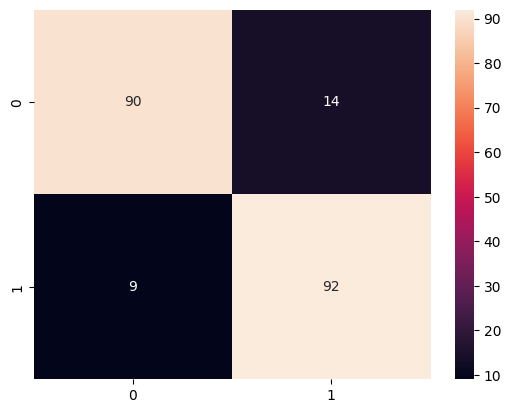

In [158]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_under)
#heat map
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')

In [159]:
#classification report
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       104
           1       0.87      0.91      0.89       101

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



 5.4 Logistic regression - SMOTE

In [160]:
log_model_smote = LogisticRegression()
log_model_smote.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
y_pred_smote = log_model_smote.predict(X_test)

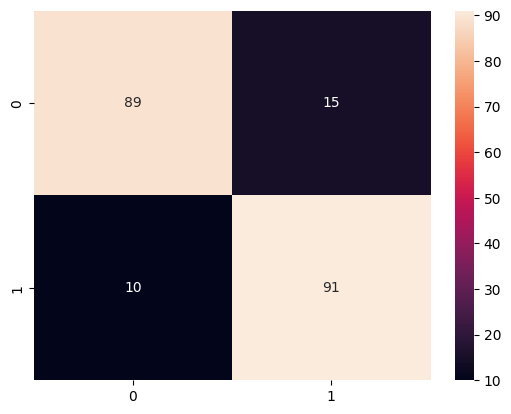

In [162]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)
#heat map
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')

In [163]:
#classification report
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       104
           1       0.86      0.90      0.88       101

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



 5.5 Logistic regression - class weight

In [164]:
model_weight=LogisticRegression(class_weight='balanced')
model_weight.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [165]:
y_pred_class_weight = log_model_smote.predict(X_test)

<Axes: >

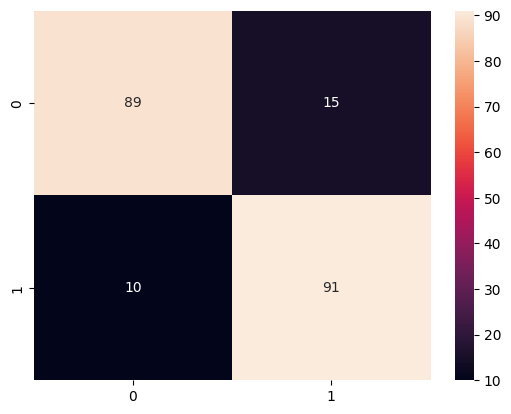

In [166]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_class_weight)
#heat map
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')

In [167]:
#classification report
print(classification_report(y_test, y_pred_class_weight))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       104
           1       0.86      0.90      0.88       101

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [168]:
#libraries import
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### **6. K - NEIGHBOURS CLASSIFIER**

In [169]:
#libraries import
from sklearn.neighbors import KNeighborsClassifier

6.1 Searching best neighbours classifier params




In [182]:
neighbors_params={'metric':['minkowski', 'chebyshev', 'manhattan', 'euclidean', 'hamming','cosine'], 'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [180]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [183]:
searcher=GridSearchCV(knn, neighbors_params)

In [184]:
searcher.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'chebyshev', 'manhattan',
                                    'euclidean', 'hamming', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [185]:
searcher.best_params_

{'metric': 'hamming', 'n_neighbors': 1}

6.2 Hamming method

In [196]:
knn=KNeighborsClassifier(n_neighbors=1, metric='hamming')

In [197]:
knn.fit(X_train, y_train)
y_hamming_pred=knn.predict(X_test)

In [198]:
print(classification_report(y_test, y_hamming_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       101

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [199]:
cm=confusion_matrix(y_test, y_hamming_pred)

<Axes: >

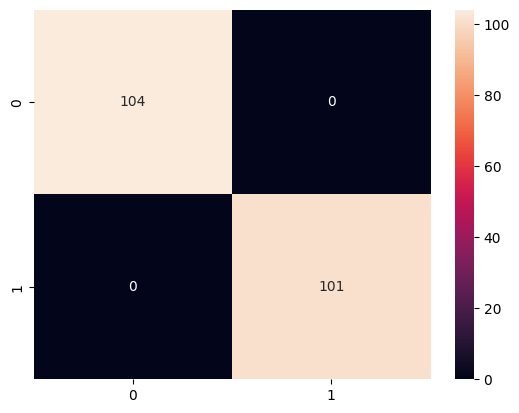

In [200]:
sns.heatmap(cm, annot=True, fmt='d')

### **7. NAIVE BAYES CLASSIFIER**

In [207]:
# libraries import
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.preprocessing import KBinsDiscretizer

7.1 Gaussian classifier

In [202]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [203]:
y_gnb_pred = gnb.predict(X_test)

In [204]:
print(classification_report(y_test, y_gnb_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       104
           1       0.82      0.86      0.84       101

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [205]:
cm=confusion_matrix(y_test, y_gnb_pred)

<Axes: >

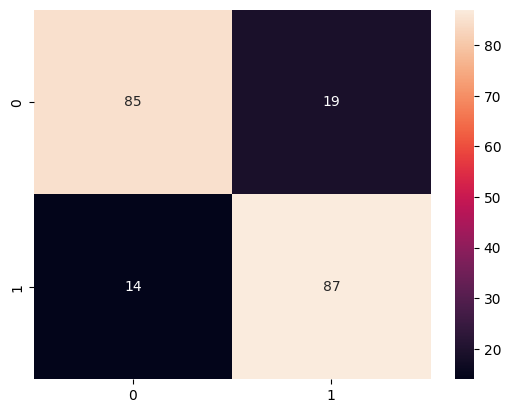

In [206]:
sns.heatmap(cm, annot=True, fmt='d')

7.2 Discretization

In [233]:
disc=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [234]:
disc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [235]:
X_disc=disc.transform(X)

In [236]:
X_disc

array([[4., 9., 0., ..., 9., 5., 9.],
       [5., 9., 0., ..., 0., 0., 9.],
       [8., 9., 0., ..., 0., 0., 9.],
       ...,
       [3., 9., 0., ..., 5., 2., 6.],
       [4., 0., 0., ..., 9., 0., 6.],
       [5., 9., 0., ..., 5., 2., 9.]])

In [237]:
X_d = X.copy()

In [238]:
X_d[:] = X_disc

<ipython-input-238-2d7169a2bfac>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_d[:] = X_disc


7.3 Multinomial classifer

In [240]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y, test_size=0.2, random_state=123)

In [241]:
mnb = MultinomialNB()
mnb.fit(X_d_train, y_d_train)

MultinomialNB()

In [242]:
y_mnb_pred = mnb.predict(X_d_test)

In [243]:
print(classification_report(y_test, y_mnb_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       104
           1       0.77      0.81      0.79       101

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



In [244]:
cm=confusion_matrix(y_d_test, y_mnb_pred)

<Axes: >

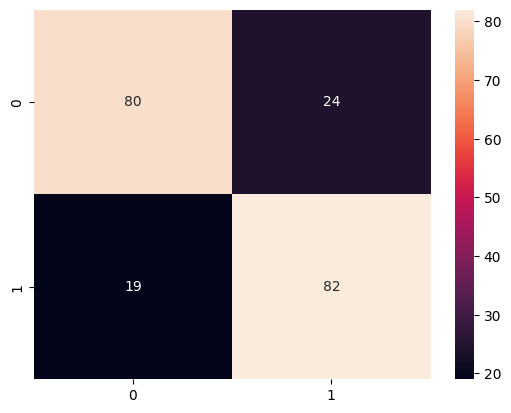

In [245]:
sns.heatmap(cm, annot=True, fmt='d')

7.4 Bernoulli Classifier

In [246]:
bnb = BernoulliNB()
bnb.fit(X_d_train, y_d_train)

BernoulliNB()

In [248]:
y_bnb_pred = bnb.predict(X_d_test)

In [249]:
print(classification_report(y_test, y_bnb_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       104
           1       0.86      0.84      0.85       101

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [251]:
cm=confusion_matrix(y_d_test, y_bnb_pred)

<Axes: >

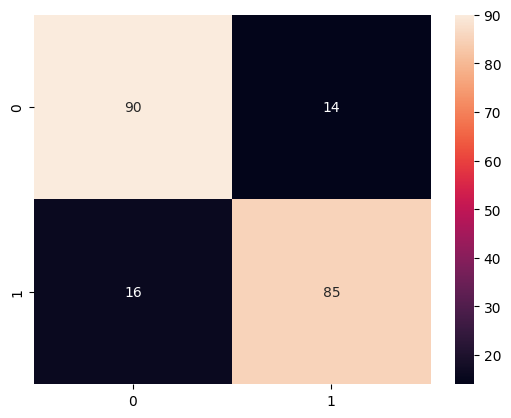

In [252]:
sns.heatmap(cm, annot=True, fmt='d')